### Importing / Installing packages

In [10]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

## 5. Loading the Raw Data into Python

In [11]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################

# Loading the data
raw_data = pd.read_csv('F:\\Github\Python tutorials\\Introduction to ML - Unsupervised Learning\\Events Raw Data.csv')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(14783, 19)


,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


In [12]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER08;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

# rynning the SQL quey i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data2]''', conn2)

#conn.close()



# Viz
SQL_Query.head()

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.6922,-2.022295,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis & Data Cleaning


In [13]:
# Checking for null values

SQL_Query.isnull().sum()

customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         5
how_often_you_attend_entertaining_events_in_a_year             5
social_media                                                   5
how_many_hours_are_you_willing_to_travel_to_attend_an_event    5
do_you_enjoy_adrenaline_rush_activities                        5
are_food_areas_coffee_areas_bars_toilets_important_to_you      5
what_is_your_favourite_at

In [14]:
# Visualize the NULL observations


SQL_Query[SQL_Query['total_household_income'].isnull()]



,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,None,None,None,None,None,None,None,None,None,None


In [15]:
# Deleting the NULL values
SQL_Query = SQL_Query.dropna(subset = ['total_household_income'])

# Printing the shape
print(SQL_Query.shape)

# Visualize the NULL observations
SQL_Query.isnull().sum()

(14778, 19)


customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         0
how_often_you_attend_entertaining_events_in_a_year             0
social_media                                                   0
how_many_hours_are_you_willing_to_travel_to_attend_an_event    0
do_you_enjoy_adrenaline_rush_activities                        0
are_food_areas_coffee_areas_bars_toilets_important_to_you      0
what_is_your_favourite_at

In [16]:
# Investigate all the elements whithin each Feature 

for column in SQL_Query:
    unique_vals = np.unique(SQL_Query[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature customer :14778
The number of values for feature age :9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values for feature gender :2 -- ['Female' 'Male']
The number of values for feature postcode :14674
The number of values for feature district :225
The number of values for feature constituency :358
The number of values for feature latitude :13242
The number of values for feature longitude :13262
The number of values for feature current_status :8 -- ['Divorced' 'Living with partner' 'Married with children'
 'Married without children' 'Separated' 'Single, never married'
 'Step parent' 'Widowed']
The number of values for feature total_household_income :8 -- ['100,000 to 149,999' '150,000 to 199,999' '20,000 to 34,999'
 '200,000 or more' '35,000 to 49,999' '50,000 to 74,999'
 '75,000 to 99,999' 'Less than 20,000']
The number of values for feature how_often_you_attend_entertaining_events_in_a_year :5

In [17]:
# Getting the columns we need

SQL_Query.columns

Index(['customer', 'age', 'gender', 'postcode', 'district', 'constituency',
       'latitude', 'longitude', 'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below',
       'were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money'],
      dtype='object')

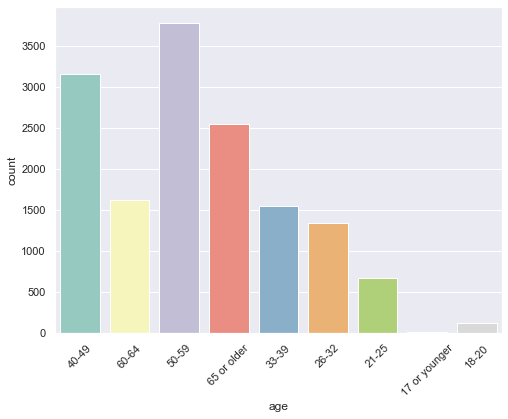

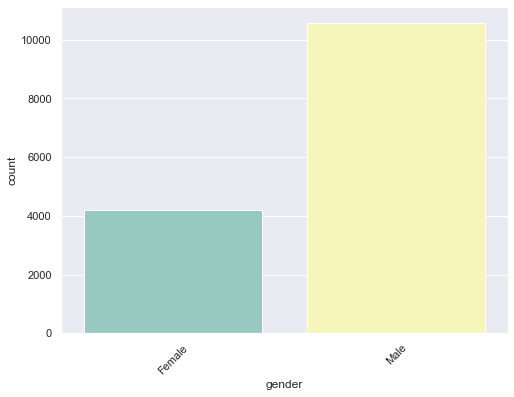

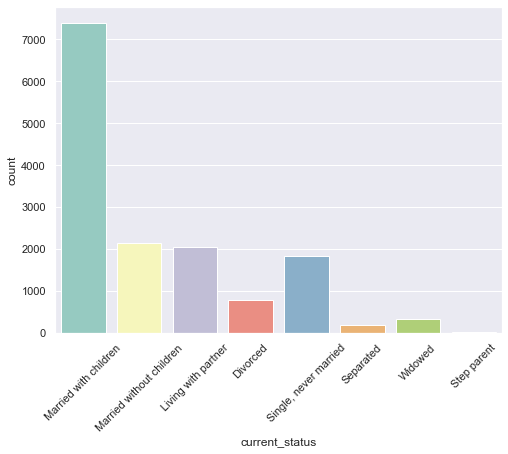

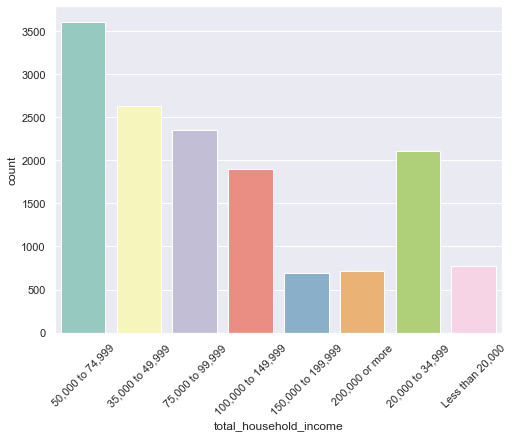

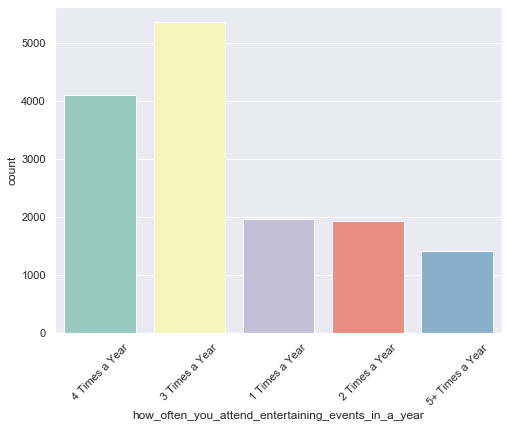

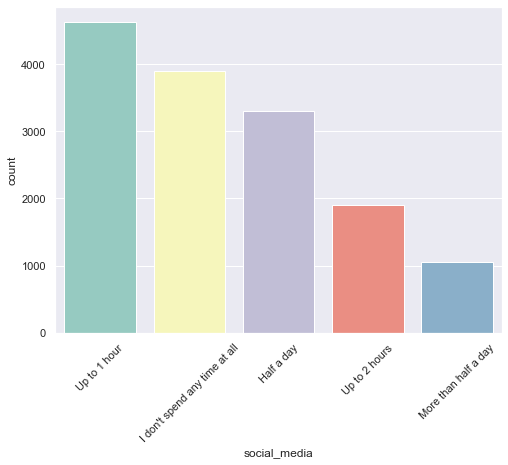

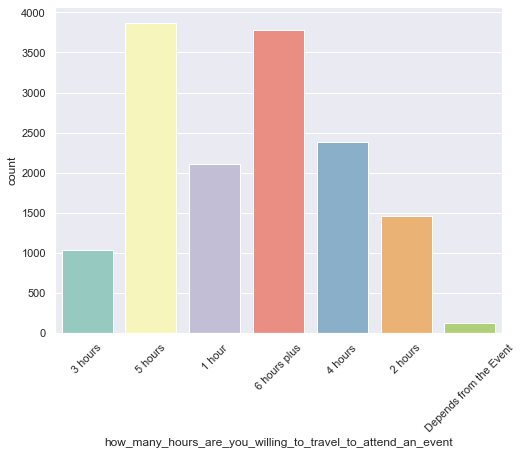

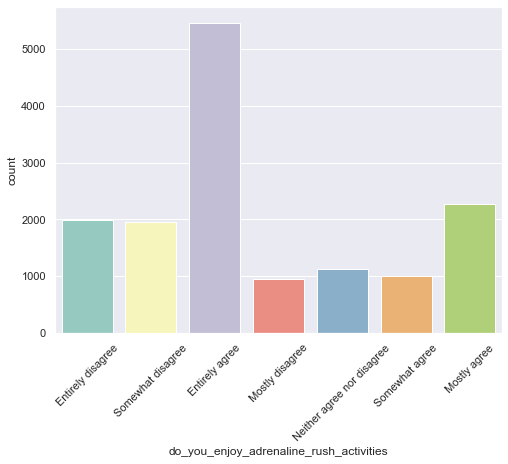

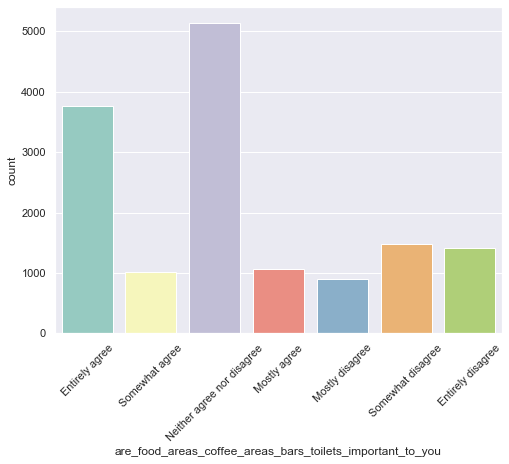

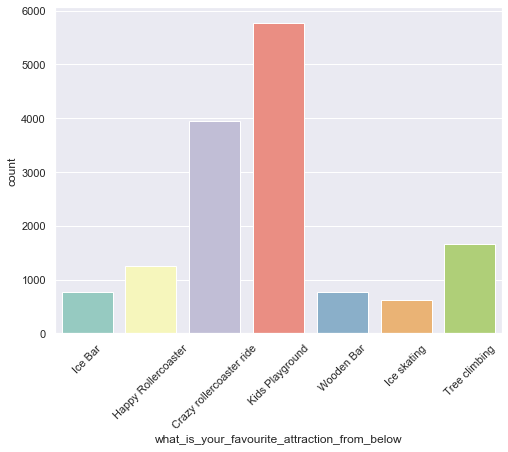

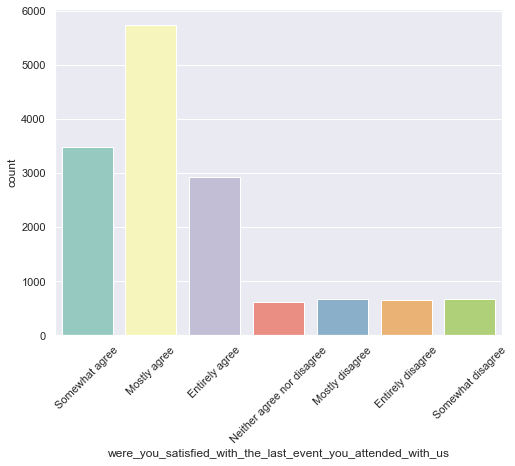

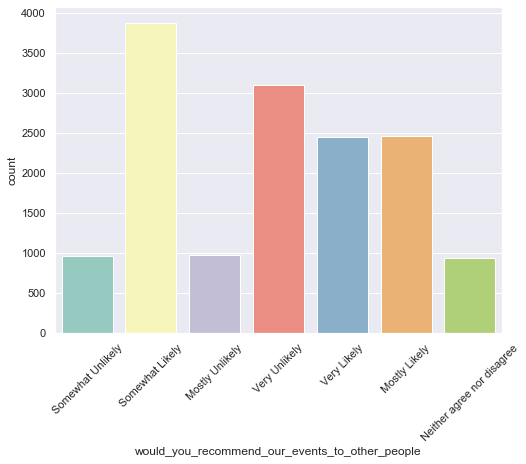

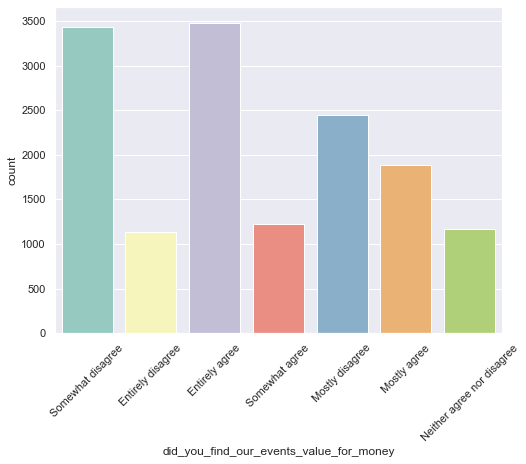

In [18]:
# Looping through all the features by our y variable - see if there is relationship

features = ['age', 'gender', 
       'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below','were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money']

for f in features:
    sns.countplot(x = f, data = SQL_Query, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


### 5.2 Feature Engineering - Creating a distance metric

In [19]:
# Creating a distance function - took this ready from the web

 
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [20]:
# Creating lat and long for our event - randoms

SQL_Query['Event Lat'] = '51.5073'
SQL_Query['Event Lon'] = '0.1657'


haversine_vectorize(SQL_Query['Event Lon'].astype(float) ,SQL_Query['Event Lat'].astype(float),SQL_Query['longitude'].astype(float) ,
                   SQL_Query['latitude'].astype(float))


SQL_Query['Distance from Event'] = haversine_vectorize(SQL_Query['Event Lon'].astype(float) ,SQL_Query['Event Lat'].astype(float),SQL_Query['longitude'].astype(float) ,
                   SQL_Query['latitude'].astype(float))

### 5.3 Feature Engineering - Numeric Representation

In [21]:
# Making categorical variables into numeric representation

print(SQL_Query.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = SQL_Query[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()



(14778, 22)
(14778, 13)
(14778, 86)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat agree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [22]:
raw_data.head()

,age,gender,current_status,total_household_income,how_often_you_attend_entertaining_events_in_a_year,social_media,how_many_hours_are_you_willing_to_travel_to_attend_an_event,do_you_enjoy_adrenaline_rush_activities,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money
0,40-49,Female,Married with children,"50,000 to 74,999",4 Times a Year,Up to 1 hour,3 hours,Entirely disagree,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree
1,60-64,Male,Married with children,"35,000 to 49,999",3 Times a Year,Up to 1 hour,5 hours,Somewhat disagree,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree
2,50-59,Male,Married with children,"75,000 to 99,999",3 Times a Year,I don't spend any time at all,5 hours,Somewhat disagree,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree
3,50-59,Female,Married without children,"35,000 to 49,999",1 Times a Year,Half a day,1 hour,Entirely agree,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree
4,60-64,Male,Married with children,"100,000 to 149,999",3 Times a Year,Up to 1 hour,6 hours plus,Mostly disagree,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree


## 6.0 K-means Clustering

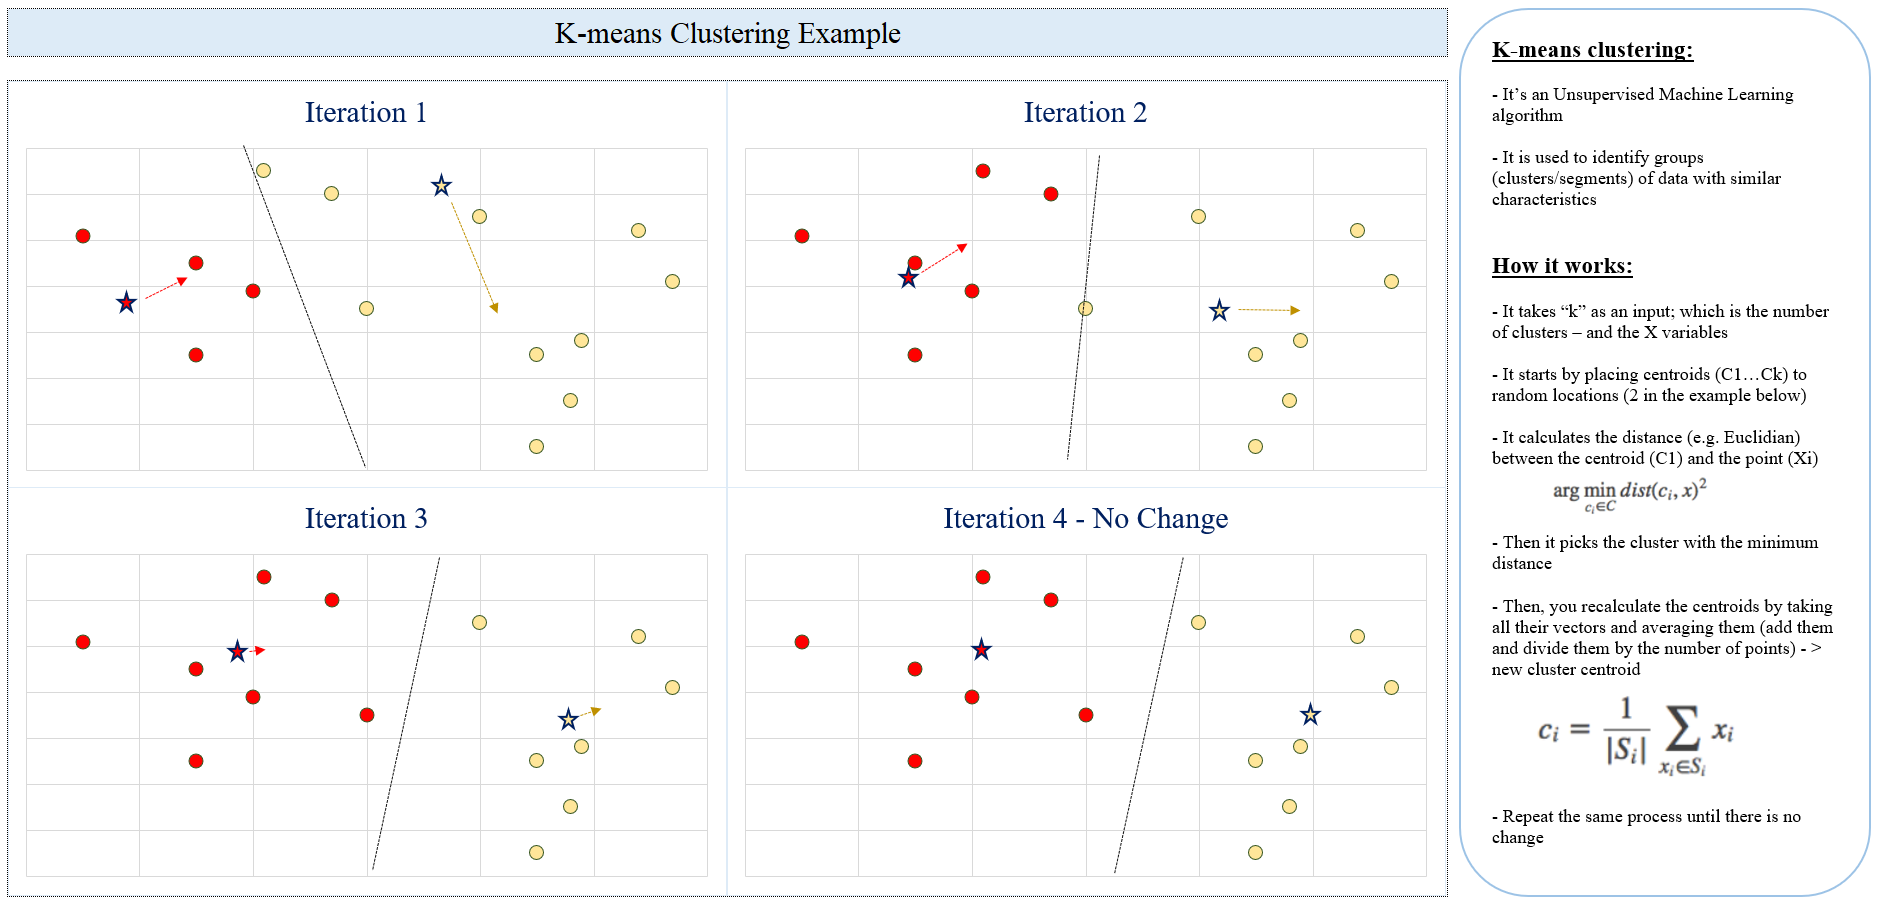

In [23]:
### Graphical - Supervised Vs Unsupervised Learning

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Unsupervised Learning\\"
Image(filename = PATH + "Kmeans.png", width=1000, height=1000)

In [24]:
# More details in how K-means works here: https://youtu.be/4b5d3muPQmA

In [25]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.25208839208


In [26]:
kmeans.labels_.shape

(14778,)

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [27]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)




The innertia for : 2 Clusters is: 125619.02972065723
The innertia for : 3 Clusters is: 114905.38684266692
The innertia for : 4 Clusters is: 106337.17594801616
The innertia for : 5 Clusters is: 100865.1652923755
The innertia for : 6 Clusters is: 96432.51946729963
The innertia for : 7 Clusters is: 93814.48234646092
The innertia for : 8 Clusters is: 91696.5751387625
The innertia for : 9 Clusters is: 89724.9723040441
The innertia for : 10 Clusters is: 88493.21259624294
The innertia for : 11 Clusters is: 87581.06059954716
The innertia for : 12 Clusters is: 86617.666088801
The innertia for : 13 Clusters is: 85829.38420440158
The innertia for : 14 Clusters is: 85014.8527166815
The innertia for : 15 Clusters is: 84434.7438149334
The innertia for : 16 Clusters is: 83662.8356495057
The innertia for : 17 Clusters is: 82854.33711923643
The innertia for : 18 Clusters is: 82485.74994726635
The innertia for : 19 Clusters is: 82187.93372039594


In [28]:
no_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

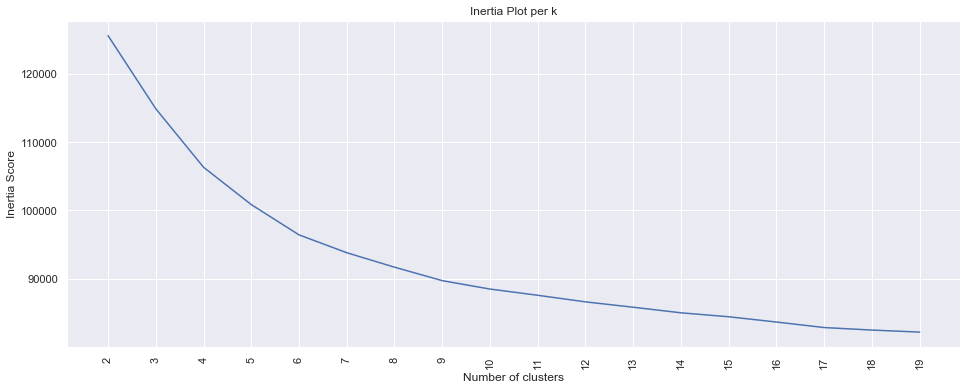

In [29]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [30]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2208,1226,8492,1865,987


In [31]:
kmeans.labels_


array([2, 2, 2, ..., 2, 0, 2])

In [32]:
predictions

array([2, 2, 2, ..., 2, 0, 2])

In [33]:
new_raw_data.shape

(14778, 86)

## 7.0 Running Principal Component Analysis (PCA) to Visualize & improve results

#### -	What is it?
 - PCA is a dimensionality reduction technique that transforms a number of possibly correlated variables into a smaller number of uncorrelated variables; called principal components
 
- The goal of PCA is to extract the most important information from the data table by compressing the size of the data set and keeping only the important information; then PCA computes new variables called principal components.

#### - Additional Info:
- The first principal component is required to have the largest possible variance (inertia) and therefore this component will explain the largest part of the inertia / variance of the data table; hence the less principal components you have the lower the inertia will be after PCA.


- For every new component you add, the inertia will increase since the rotations are always performed in a subspace and the new axes will always explain less inertia than the original components; which are computed to be optimal


- Therefore, inertia should not be the criterium to choose the optimal number of principal component since the lower the components are the lower the inertia will be.


- 95% explained variance should be the criterium when choosing the number of principal components

In [36]:
# Additional resources:
# kmeans SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# PCA SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# PCA - How it works: https://youtu.be/FgakZw6K1QQ 
# How to compute PCA: https://youtu.be/fKivxsVlycs

Explained variance ratio (first two components): [0.167356 0.078177]


<Figure size 576x432 with 0 Axes>

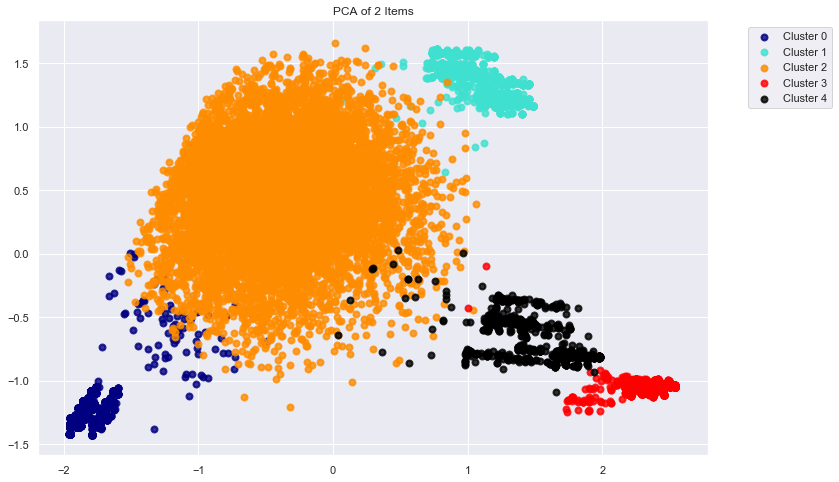

In [37]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [38]:
# Additional resources:
# kmeans SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# PCA SK-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# PCA - How it works: https://youtu.be/FgakZw6K1QQ 
# How to compute PCA: https://youtu.be/fKivxsVlycs

### Why dimensionality reduction could help k-means perform better: 

- Kmeans is extremely sensitive to scale, and when you have a lot of attributes there is no true scale anymore. This is where PCA comes in since it whitens your data. 


- By doing this, you will remove global correlation which can sometimes give better results. K-means is a "least squares" optimization problem; same with PCA. 


- Kmeans tries to find the least squares partition of the data while PCA finds the least squares cluster membership vector. The first eigenvector has the largest variance (smallest inertia), hence splitting on this vector (which shows the cluster membership - not input data coordinates) means maximization of cluster variance; better fit for Kmeans. 


- By maximizing between cluster variance, you minimize within-cluster variance. Therefore, applying PCA before clustering could potentially help you get better clusters (with more variance) in Kmeans


### 7.1. Identifying the "best" number of components

Total Variance in our dataset is:  9.78927750842857
The 95% variance we want to have is:  9.299813633007142

Variance explain with 30 n_compononets:  7.80006328761734
Variance explain with 35 n_compononets:  8.200059944222117
Variance explain with 40 n_compononets:  8.559358189926282
Variance explain with 41 n_compononets:  8.625206072416148
Variance explain with 50 n_compononets:  9.157222065601193
Variance explain with 53 n_compononets:  9.301801997586795
Variance explain with 55 n_compononets:  9.391528190593434
Variance explain with 60 n_compononets:  9.592274980903566


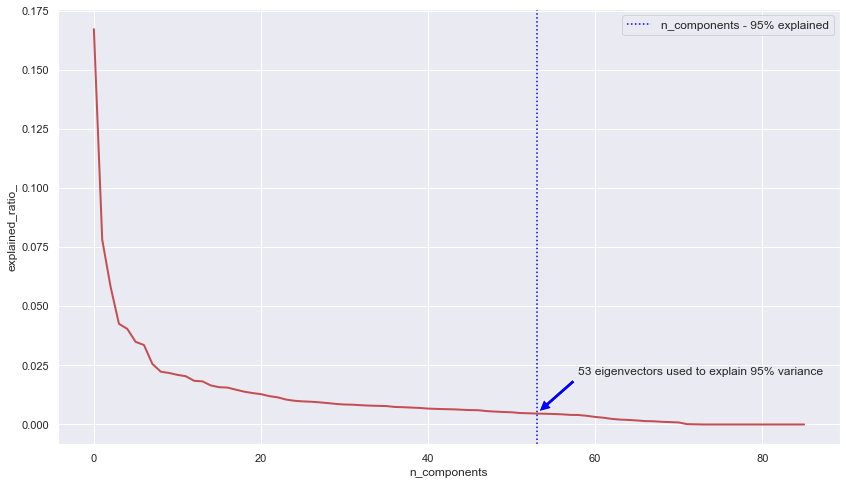

In [39]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(53,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('53 eigenvectors used to explain 95% variance', xy=(53, pca.explained_variance_ratio_[53]), 
             xytext=(58, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()




The innertia for : 2 Clusters is: 118418.00533439952
The innertia for : 3 Clusters is: 107706.7380479884
The innertia for : 4 Clusters is: 99150.89658689544
The innertia for : 5 Clusters is: 94717.69354231445
The innertia for : 6 Clusters is: 89259.77749749688
The innertia for : 7 Clusters is: 87032.31815907733
The innertia for : 8 Clusters is: 84734.03832158013
The innertia for : 9 Clusters is: 82901.42563972164
The innertia for : 10 Clusters is: 81675.79302907933
The innertia for : 11 Clusters is: 80363.07116110729
The innertia for : 12 Clusters is: 79645.5784974978
The innertia for : 13 Clusters is: 78836.55417592353
The innertia for : 14 Clusters is: 77765.06416907407
The innertia for : 15 Clusters is: 77471.37531435612
The innertia for : 16 Clusters is: 76646.9373076288
The innertia for : 17 Clusters is: 75782.72402164634
The innertia for : 18 Clusters is: 75256.91479943303
The innertia for : 19 Clusters is: 74707.75842734543


Text(0.5, 1.0, 'Inertia Plot per k')

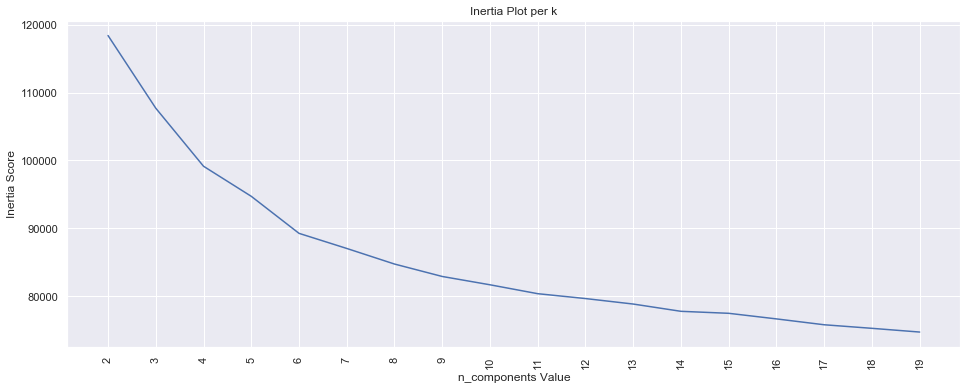

In [40]:
# Running PCA again

pca = PCA(n_components=53, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We managed to improve our results by reducing inertia


## 8.0. Another way of "Improving" results Could* be to Clean/Combine Variables

In [41]:
# Visualizing all of your variables / columns
new_raw_data.columns

Index(['age_17 or younger', 'age_18-20', 'age_21-25', 'age_26-32', 'age_33-39',
       'age_40-49', 'age_50-59', 'age_60-64', 'age_65 or older',
       'gender_Female', 'gender_Male', 'current_status_Divorced',
       'current_status_Living with partner',
       'current_status_Married with children',
       'current_status_Married without children', 'current_status_Separated',
       'current_status_Single, never married', 'current_status_Step parent',
       'current_status_Widowed', 'total_household_income_100,000 to 149,999',
       'total_household_income_150,000 to 199,999',
       'total_household_income_20,000 to 34,999',
       'total_household_income_200,000 or more',
       'total_household_income_35,000 to 49,999',
       'total_household_income_50,000 to 74,999',
       'total_household_income_75,000 to 99,999',
       'total_household_income_Less than 20,000',
       'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       'how_often_you_attend_entertai

In [42]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", new_raw_data.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column

# 1-2 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(new_raw_data['how_often_you_attend_entertaining_events_in_a_year_1 Times a Year'] == 1) |     (new_raw_data['how_often_you_attend_entertaining_events_in_a_year_2 Times a Year'] == 1)] = 1

# 4-5 times
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(new_raw_data['how_often_you_attend_entertaining_events_in_a_year_4 Times a Year'] == 1) | (new_raw_data['how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "social_media" column

# half a day + more than half a day
new_raw_data['social_media_Half a day plus'] = 0
new_raw_data['social_media_Half a day plus'][(new_raw_data['social_media_Half a day'] == 1) | (new_raw_data['social_media_More than half a day'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column

# 1 to 2 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour'] == 1) | (new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours'] == 1)] = 1

# 3 to 4 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours'] == 1) | (new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours'] == 1)] = 1

# 5 to 6 hours
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'] = 0
new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours'][(new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours'] == 1) | (new_raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column

# Mostly & Somewhat Agree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(new_raw_data['do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1) | (new_raw_data['do_you_enjoy_adrenaline_rush_activities_Mostly agree'] == 1)] = 1

# Mostly & Somewhat Disagree
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
new_raw_data['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(new_raw_data['do_you_enjoy_adrenaline_rush_activities_Mostly disagree'] == 1) | (new_raw_data['do_you_enjoy_adrenaline_rush_activities_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)





The shape is:  (14778, 86)
The shape is:  (14778, 88)
The shape is:  (14778, 89)


C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel

The shape is:  (14778, 92)
The shape is:  (14778, 94)


C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
# Cleaning the "are_food_areas_coffee_areas_bars_toilets_important_to_you" column

# Mostly & Somewhat Agree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree'][(new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree'] == 1) | (new_raw_data['do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1)] = 1


# Mostly & Somewhat & entirely Disagree
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'] = 0
new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree'][(new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree'] == 1) | (new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree'] == 1) | (new_raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)



# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column

# Entirely & Mostly & Somewhat & Neither Disagree
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'] = 0
new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree'][(new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree'] == 1) | (new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree'] == 1) | (new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree'] == 1) | (new_raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "would_you_recommend_our_events_to_other_people" column

# Mostly & Somewhat & Neither Unlikely
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
new_raw_data['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(new_raw_data['would_you_recommend_our_events_to_other_people_Mostly Unlikely'] == 1) | (new_raw_data['would_you_recommend_our_events_to_other_people_Somewhat Unlikely'] == 1) | (new_raw_data['would_you_recommend_our_events_to_other_people_Neither agree nor disagree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)


# Cleaning the "did_you_find_our_events_value_for_money" column

# Mostly & Somewhat agree
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
new_raw_data['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(new_raw_data['did_you_find_our_events_value_for_money_Somewhat agree'] == 1) | (new_raw_data['did_you_find_our_events_value_for_money_Mostly agree'] == 1)] = 1

print("The shape is: ", new_raw_data.shape)

The shape is:  (14778, 96)
The shape is:  (14778, 97)


C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pitsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:

The shape is:  (14778, 98)
The shape is:  (14778, 99)


In [44]:
# Replacing apostrophe from columns names
new_raw_data.columns = new_raw_data.columns.str.replace("'","")

# Excluding the fields we have merged together
new_features = ['age_17 or younger', 'age_18-20', 'age_21-25', 'age_26-32', 'age_33-39',
       'age_40-49', 'age_50-59', 'age_60-64', 'age_65 or older',
       'gender_Female', 'gender_Male', 'current_status_Divorced',
       'current_status_Living with partner',
       'current_status_Married with children',
       'current_status_Married without children', 'current_status_Separated',
       'current_status_Single, never married', 'current_status_Step parent',
       'current_status_Widowed', 'total_household_income_100,000 to 149,999',
       'total_household_income_150,000 to 199,999',
       'total_household_income_20,000 to 34,999',
       'total_household_income_200,000 or more',
       'total_household_income_35,000 to 49,999',
       'total_household_income_50,000 to 74,999',
       'total_household_income_75,000 to 99,999',
       'total_household_income_Less than 20,000',
       #'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_2 Times a Year',
       'how_often_you_attend_entertaining_events_in_a_year_3 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_4 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year',
                
       #'social_media_Half a day', 
       'social_media_I dont spend any time at all',
       #'social_media_More than half a day', 
       'social_media_Up to 1 hour',
       'social_media_Up to 2 hours',
                
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
                
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event_Depends from the Event',
                
       'do_you_enjoy_adrenaline_rush_activities_Entirely agree',
       'do_you_enjoy_adrenaline_rush_activities_Entirely disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       'do_you_enjoy_adrenaline_rush_activities_Neither agree nor disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',
                
       'are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Entirely disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Mostly disagree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you_Neither agree nor disagree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat agree',
       #'are_food_areas_coffee_areas_bars_toilets_important_to_you_Somewhat disagree',
                
       'what_is_your_favourite_attraction_from_below_Crazy rollercoaster ride',
       'what_is_your_favourite_attraction_from_below_Happy Rollercoaster',
       'what_is_your_favourite_attraction_from_below_Ice Bar',
       'what_is_your_favourite_attraction_from_below_Ice skating',
       'what_is_your_favourite_attraction_from_below_Kids Playground',
       'what_is_your_favourite_attraction_from_below_Tree climbing',
       'what_is_your_favourite_attraction_from_below_Wooden Bar',
                
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree',
                
       'would_you_recommend_our_events_to_other_people_Mostly Likely',
       #'would_you_recommend_our_events_to_other_people_Mostly Unlikely',
       #'would_you_recommend_our_events_to_other_people_Neither agree nor disagree',
       'would_you_recommend_our_events_to_other_people_Somewhat Likely',
       #'would_you_recommend_our_events_to_other_people_Somewhat Unlikely',
       'would_you_recommend_our_events_to_other_people_Very Likely',
       'would_you_recommend_our_events_to_other_people_Very Unlikely',
                
       'did_you_find_our_events_value_for_money_Entirely agree',
       'did_you_find_our_events_value_for_money_Entirely disagree',
       #'did_you_find_our_events_value_for_money_Mostly agree',
       'did_you_find_our_events_value_for_money_Mostly disagree',
       'did_you_find_our_events_value_for_money_Neither agree nor disagree',
       #'did_you_find_our_events_value_for_money_Somewhat agree',
       'did_you_find_our_events_value_for_money_Somewhat disagree',
                
       'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
                
       'social_media_Half a day plus',
                
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5 to 6 hours',
                
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
                
       'are_food_areas_coffee_areas_bars_toilets_important_to_you Mostly & Somewhat Agree',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you - Mostly & Somewhat & entirely Disagree',
                
       'were_you_satisfied_with_the_last_event_you_attended_with_us Entirely & Mostly & Somewhat & Neither Disagree',
                
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
                
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

The innertia for : 2 Clusters is: 115889.01837591952
The innertia for : 3 Clusters is: 103553.959063614
The innertia for : 4 Clusters is: 96312.40023751535
The innertia for : 5 Clusters is: 91318.39333843137
The innertia for : 6 Clusters is: 89054.4483762541
The innertia for : 7 Clusters is: 86972.09486673611
The innertia for : 8 Clusters is: 85071.79180589106
The innertia for : 9 Clusters is: 83628.8792806013
The innertia for : 10 Clusters is: 82416.29549241357
The innertia for : 11 Clusters is: 81113.85732345973
The innertia for : 12 Clusters is: 80129.11806890354
The innertia for : 13 Clusters is: 78832.73289215546
The innertia for : 14 Clusters is: 78352.70287801677
The innertia for : 15 Clusters is: 77214.3437222475
The innertia for : 16 Clusters is: 76922.04495414351
The innertia for : 17 Clusters is: 76020.82669559948
The innertia for : 18 Clusters is: 75503.86100606322
The innertia for : 19 Clusters is: 74746.85433779325
The innertia for : 20 Clusters is: 74480.05111070463


Text(0.5, 1.0, 'Inertia Plot per k')

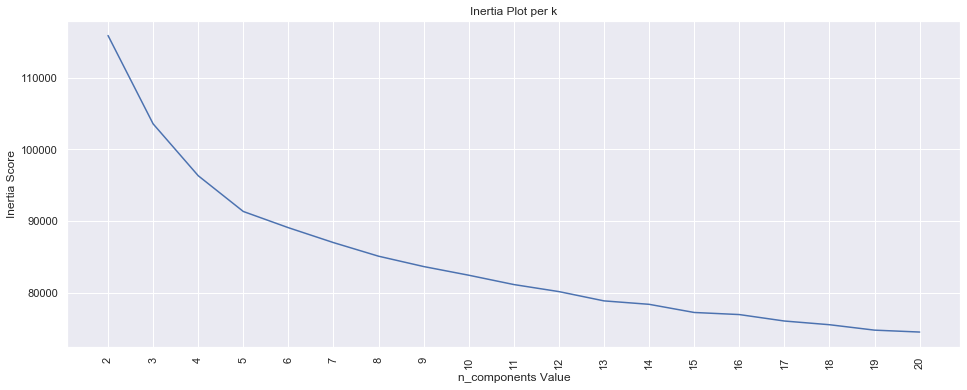

In [45]:
# Re - Running Kmeans on "new" data

X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion:
- The intertia improved vs the initial run before PCA and Vs the PCA run - Now we want to apply both

### 8.1. Running PCA on New Dataset after grouping

Explained variance ratio (first two components): [0.192736 0.096372]


<Figure size 576x432 with 0 Axes>

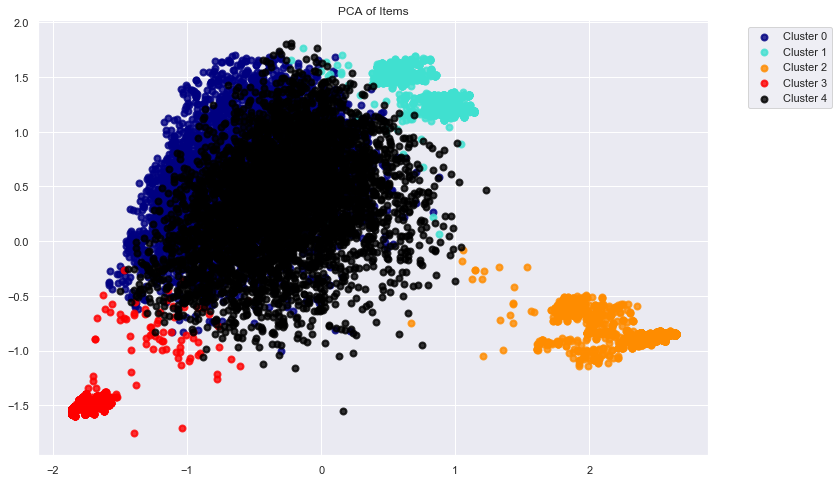

In [46]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.320593691463236
The 95% variance we want to have is:  8.854564006890074

Variance explain with 30 n_compononets:  8.1492400016547
Variance explain with 35 n_compononets:  8.532279526805011
Variance explain with 36 n_compononets:  8.597572399918215
Variance explain with 40 n_compononets:  8.837684536510416
Variance explain with 41 n_compononets:  8.88862708697323
Variance explain with 50 n_compononets:  9.249769314007201


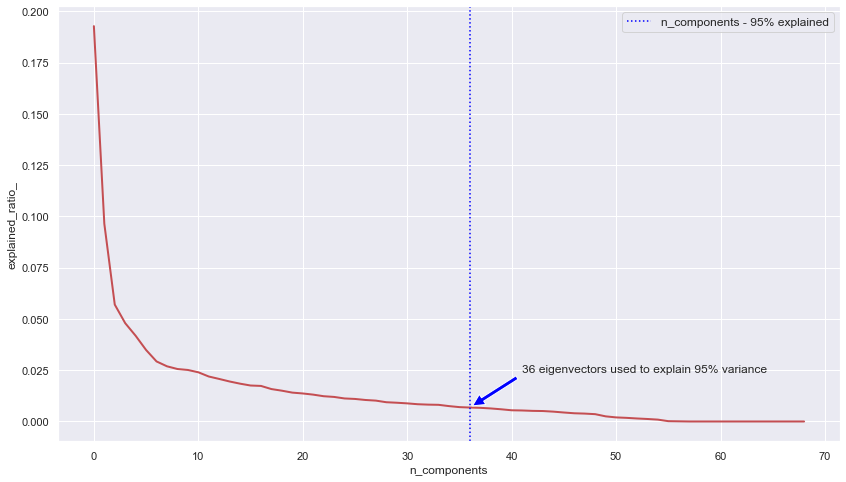

In [47]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(36,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('36 eigenvectors used to explain 95% variance', xy=(36, pca.explained_variance_ratio_[36]), xytext=(41, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 105204.78290817018
The innertia for : 3 Clusters is: 92876.0072762068
The innertia for : 4 Clusters is: 85658.60106492859
The innertia for : 5 Clusters is: 80676.8366311116
The innertia for : 6 Clusters is: 78439.20717947271
The innertia for : 7 Clusters is: 76446.46130691048
The innertia for : 8 Clusters is: 74462.70591527782
The innertia for : 9 Clusters is: 72935.61197634348
The innertia for : 10 Clusters is: 71665.9881314497
The innertia for : 11 Clusters is: 70615.00694358117
The innertia for : 12 Clusters is: 69653.31249222156
The innertia for : 13 Clusters is: 68699.28752271339
The innertia for : 14 Clusters is: 67836.54960068349
The innertia for : 15 Clusters is: 66855.43733049267
The innertia for : 16 Clusters is: 66232.91600668924
The innertia for : 17 Clusters is: 65325.61985861002
The innertia for : 18 Clusters is: 65106.8806887891
The innertia for : 19 Clusters is: 64505.02009204678
The innertia for : 20 Clusters is: 63906.507933390145


Text(0.5, 1.0, 'Inertia Plot per k')

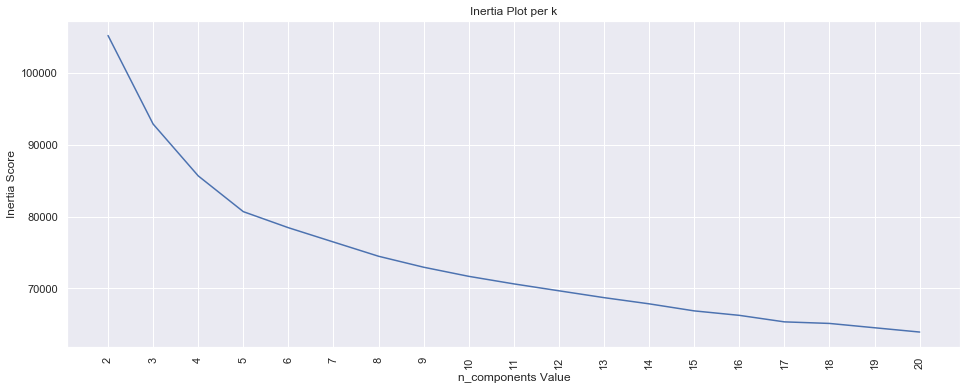

In [48]:
# Running PCA again

pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

### Conclusion: 
- We managed to improve our results further more; from 91318 to 80676 with 5 clusters


## 9. Running Kmeans with 5 clusters and using a PCA dataset with 36 components

In [49]:
# Running PCA with 36 PC
pca = PCA(n_components=36, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
SQL_Query['Clusters'] = clusters

# Creating a cluster Category
SQL_Query['Clusters Category'] = 'No Data'
SQL_Query['Clusters Category'].loc[SQL_Query['Clusters'] == 0] = 'Cluster 1'
SQL_Query['Clusters Category'].loc[SQL_Query['Clusters'] == 1] = 'Cluster 2'
SQL_Query['Clusters Category'].loc[SQL_Query['Clusters'] == 2] = 'Cluster 3'
SQL_Query['Clusters Category'].loc[SQL_Query['Clusters'] == 3] = 'Cluster 4'
SQL_Query['Clusters Category'].loc[SQL_Query['Clusters'] == 4] = 'Cluster 5'

SQL_Query.head(5)

C:\Users\pitsi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,...,are_food_areas_coffee_areas_bars_toilets_important_to_you,what_is_your_favourite_attraction_from_below,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people,did_you_find_our_events_value_for_money,Event Lat,Event Lon,Distance from Event,Clusters,Clusters Category
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Entirely agree,Ice Bar,Somewhat agree,Somewhat Unlikely,Somewhat disagree,51.5073,0.1657,34.342502,2,Cluster 3
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely agree,Happy Rollercoaster,Mostly agree,Somewhat Likely,Entirely disagree,51.5073,0.1657,41.376761,0,Cluster 1
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.6922,-2.022295,Married with children,"75,000 to 99,999",...,Somewhat agree,Happy Rollercoaster,Mostly agree,Mostly Unlikely,Entirely disagree,51.5073,0.1657,701.484783,0,Cluster 1
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Neither agree nor disagree,Crazy rollercoaster ride,Somewhat agree,Somewhat Likely,Somewhat disagree,51.5073,0.1657,176.943287,1,Cluster 2
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Neither agree nor disagree,Kids Playground,Entirely agree,Very Unlikely,Entirely agree,51.5073,0.1657,17.216110,4,Cluster 5


In [50]:
#SQL_Query['do_you_enjoy_adrenaline_rush_activities'].unique()

SQL_Query.columns

Index(['customer', 'age', 'gender', 'postcode', 'district', 'constituency',
       'latitude', 'longitude', 'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below',
       'were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money', 'Event Lat', 'Event Lon',
       'Distance from Event', 'Clusters', 'Clusters Category'],
      dtype='object')

In [51]:
# Creating an order for Household Income

SQL_Query['Household Income Order'] = 0
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == 'Less than 20,000'] = 1
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '20,000 to 34,999'] = 2
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '35,000 to 49,999'] = 3
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '50,000 to 74,999'] = 4
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '75,000 to 99,999'] = 5
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '100,000 to 149,999'] = 6
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '150,000 to 199,999'] = 7
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '200,000 or more'] = 8

# Replacing apostrophe from columns names
SQL_Query['social_media'] = SQL_Query['social_media'].str.replace("'","")

# Creating an order for Social Media Time Spend
SQL_Query['Social Media Time Spend Order'] = 0
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'I dont spend any time at all'] = 1
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Up to 1 hour'] = 2
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Up to 2 hours'] = 3
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Half a day'] = 4
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'More than half a day'] = 5

# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely agree'] = 1
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly agree'] = 2
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat agree'] = 3
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Neither agree nor disagree'] = 4
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat disagree'] = 5
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly disagree'] = 6
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely disagree'] = 7

# Creating an order for do_you_enjoy_adrenaline_rush_activities
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'] = 0
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely agree'] = 1
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly agree'] = 2
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat agree'] = 3
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Neither agree nor disagree'] = 4
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat disagree'] = 5
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly disagree'] = 6
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely disagree'] = 7

# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
SQL_Query['Satisfied Agree Order'] = 0
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely agree'] = 1
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly agree'] = 2
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat agree'] = 3
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Neither agree nor disagree'] = 4
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat disagree'] = 5
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly disagree'] = 6
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely disagree'] = 7

# Creating an order for did_you_find_our_events_value_for_money
SQL_Query['Value_for_money Agree Order'] = 0
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Entirely agree'] = 1
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Mostly agree'] = 2
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Somewhat agree'] = 3
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Neither agree nor disagree'] = 4
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Somewhat disagree'] = 5
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Mostly disagree'] = 6
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
SQL_Query['Recommend Order'] = 0
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Very Likely'] = 1
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Mostly Likely'] = 2
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Somewhat Likely'] = 3
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Neither agree nor disagree'] = 4
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Somewhat Unlikely'] = 5
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Mostly Unlikely'] = 6
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Very Unlikely'] = 7




In [52]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER08;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

SQL_Query.to_sql('Events_Cluster_Output', schema='dbo', con = engine, if_exists = 'replace')


In [53]:
# Exporting the data in a CSV

SQL_Query.to_csv('Events_Cluster_Output', sep='\t')

In [54]:

SQL_Query.head()

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,...,Distance from Event,Clusters,Clusters Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,34.342502,2,Cluster 3,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,41.376761,0,Cluster 1,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.6922,-2.022295,Married with children,"75,000 to 99,999",...,701.484783,0,Cluster 1,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,176.943287,1,Cluster 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,17.216110,4,Cluster 5,6,2,4,6,1,1,7


In [56]:
os. getcwd() 

'C:\\Users\\pitsi\\Desktop\\Python Tutorials\\Unsupervised Learning'